# Depthwise Separable Convolutions with Deep Residual

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/CS6905/
!ls

Mounted at /content/drive
/content/drive/My Drive/CS6905
'Gerenerate graphs.ipynb'   optimized_stats.processed.json   Stock_XceptionNet.ipynb
 optimized_stats.json	    optimized_XceptionNet.ipynb      xception_stats.json


In [2]:
import json
def read_data(filepath):
  with open(filepath) as f:
    js_obj = json.load(f)
  return js_obj

xception = read_data('./xception_stats.json')
dp_optimized = read_data('./optimized_stats.processed.json')
optimized = read_data('./optimized_stats.json')


In [3]:
xception_t_time, xception_t_loss, xception_t_mem, xecption_v_acc, xecption_v_loss, xecption_v_time = ([], [], [], [], [], [])
dpo_t_time, dpo_t_loss, dpo_t_mem, dpo_v_acc, dpo_v_loss, dpo_v_time = ([], [], [], [], [], [])
op_t_time, op_t_loss, op_t_mem, op_v_acc, op_v_loss, op_v_time = ([], [], [], [], [], [])

# print(xception['train_time_logs'])
last = 0
for k, value in xception['train_time_logs'].items():
  if int(k) > 0:
    value = [last+x for x in value]
    xception_t_time.extend(value)
  else:
    xception_t_time.extend(value)
  last = value[-1]

for k, value in xception['train_loss_logs'].items():
  xception_t_loss.extend(sum(value[i:i+500])/len(value[i:i+500]) for i in range(1564) if i%500==0)
for k, value in xception['train_mem_usage'].items():
  xception_t_mem.extend((sum(value[i:i+500])/len(value[i:i+500]))/1048576 for i in range(1564) if i%500==0)
for k, value in xception['test_time_logs'].items():
  xecption_v_time.append(value)
for k, value in xception['test_loss_logs'].items():
  xecption_v_loss.append(value)
for k, value in xception['test_acc_logs'].items():
  xecption_v_acc.append(value)

last = 0
for k, value in dp_optimized['train_time_logs'].items():
  if int(k) > 0:
    value = [last+x for x in value]
    dpo_t_time.extend(value)
  else:
    dpo_t_time.extend(value)
  last = value[-1]
for k, value in dp_optimized['train_loss_logs'].items():
  dpo_t_loss.extend(sum(value[i:i+500])/len(value[i:i+500]) for i in range(1564) if i%500==0)
for k, value in dp_optimized['train_mem_usage'].items():
  dpo_t_mem.extend((sum(value[i:i+500])/len(value[i:i+500]))/1048576 for i in range(1564) if i%500==0)
for k, value in dp_optimized['test_time_logs'].items():
  dpo_v_time.append(value)
for k, value in dp_optimized['test_loss_logs'].items():
  dpo_v_loss.append(value)
for k, value in dp_optimized['test_acc_logs'].items():
  dpo_v_acc.append(value)

last = 0
for k, value in optimized['train_time_logs'].items():
  if int(k) > 0:
    value = [last+x for x in value]
    op_t_time.extend(value)
  else:
    op_t_time.extend(value)
  last = value[-1]
for k, value in optimized['train_loss_logs'].items():
  op_t_loss.extend(sum(value[i:i+500])/len(value[i:i+500]) for i in range(1564) if i%500==0)
for k, value in optimized['train_mem_usage'].items():
  op_t_mem.extend((sum(value[i:i+500])/len(value[i:i+500]))/1048576 for i in range(1564) if i%500==0)
for k, value in optimized['test_time_logs'].items():
  op_v_time.append(value)
for k, value in optimized['test_loss_logs'].items():
  op_v_loss.append(value)
for k, value in optimized['test_acc_logs'].items():
  op_v_acc.append(value)

x_tick_val = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


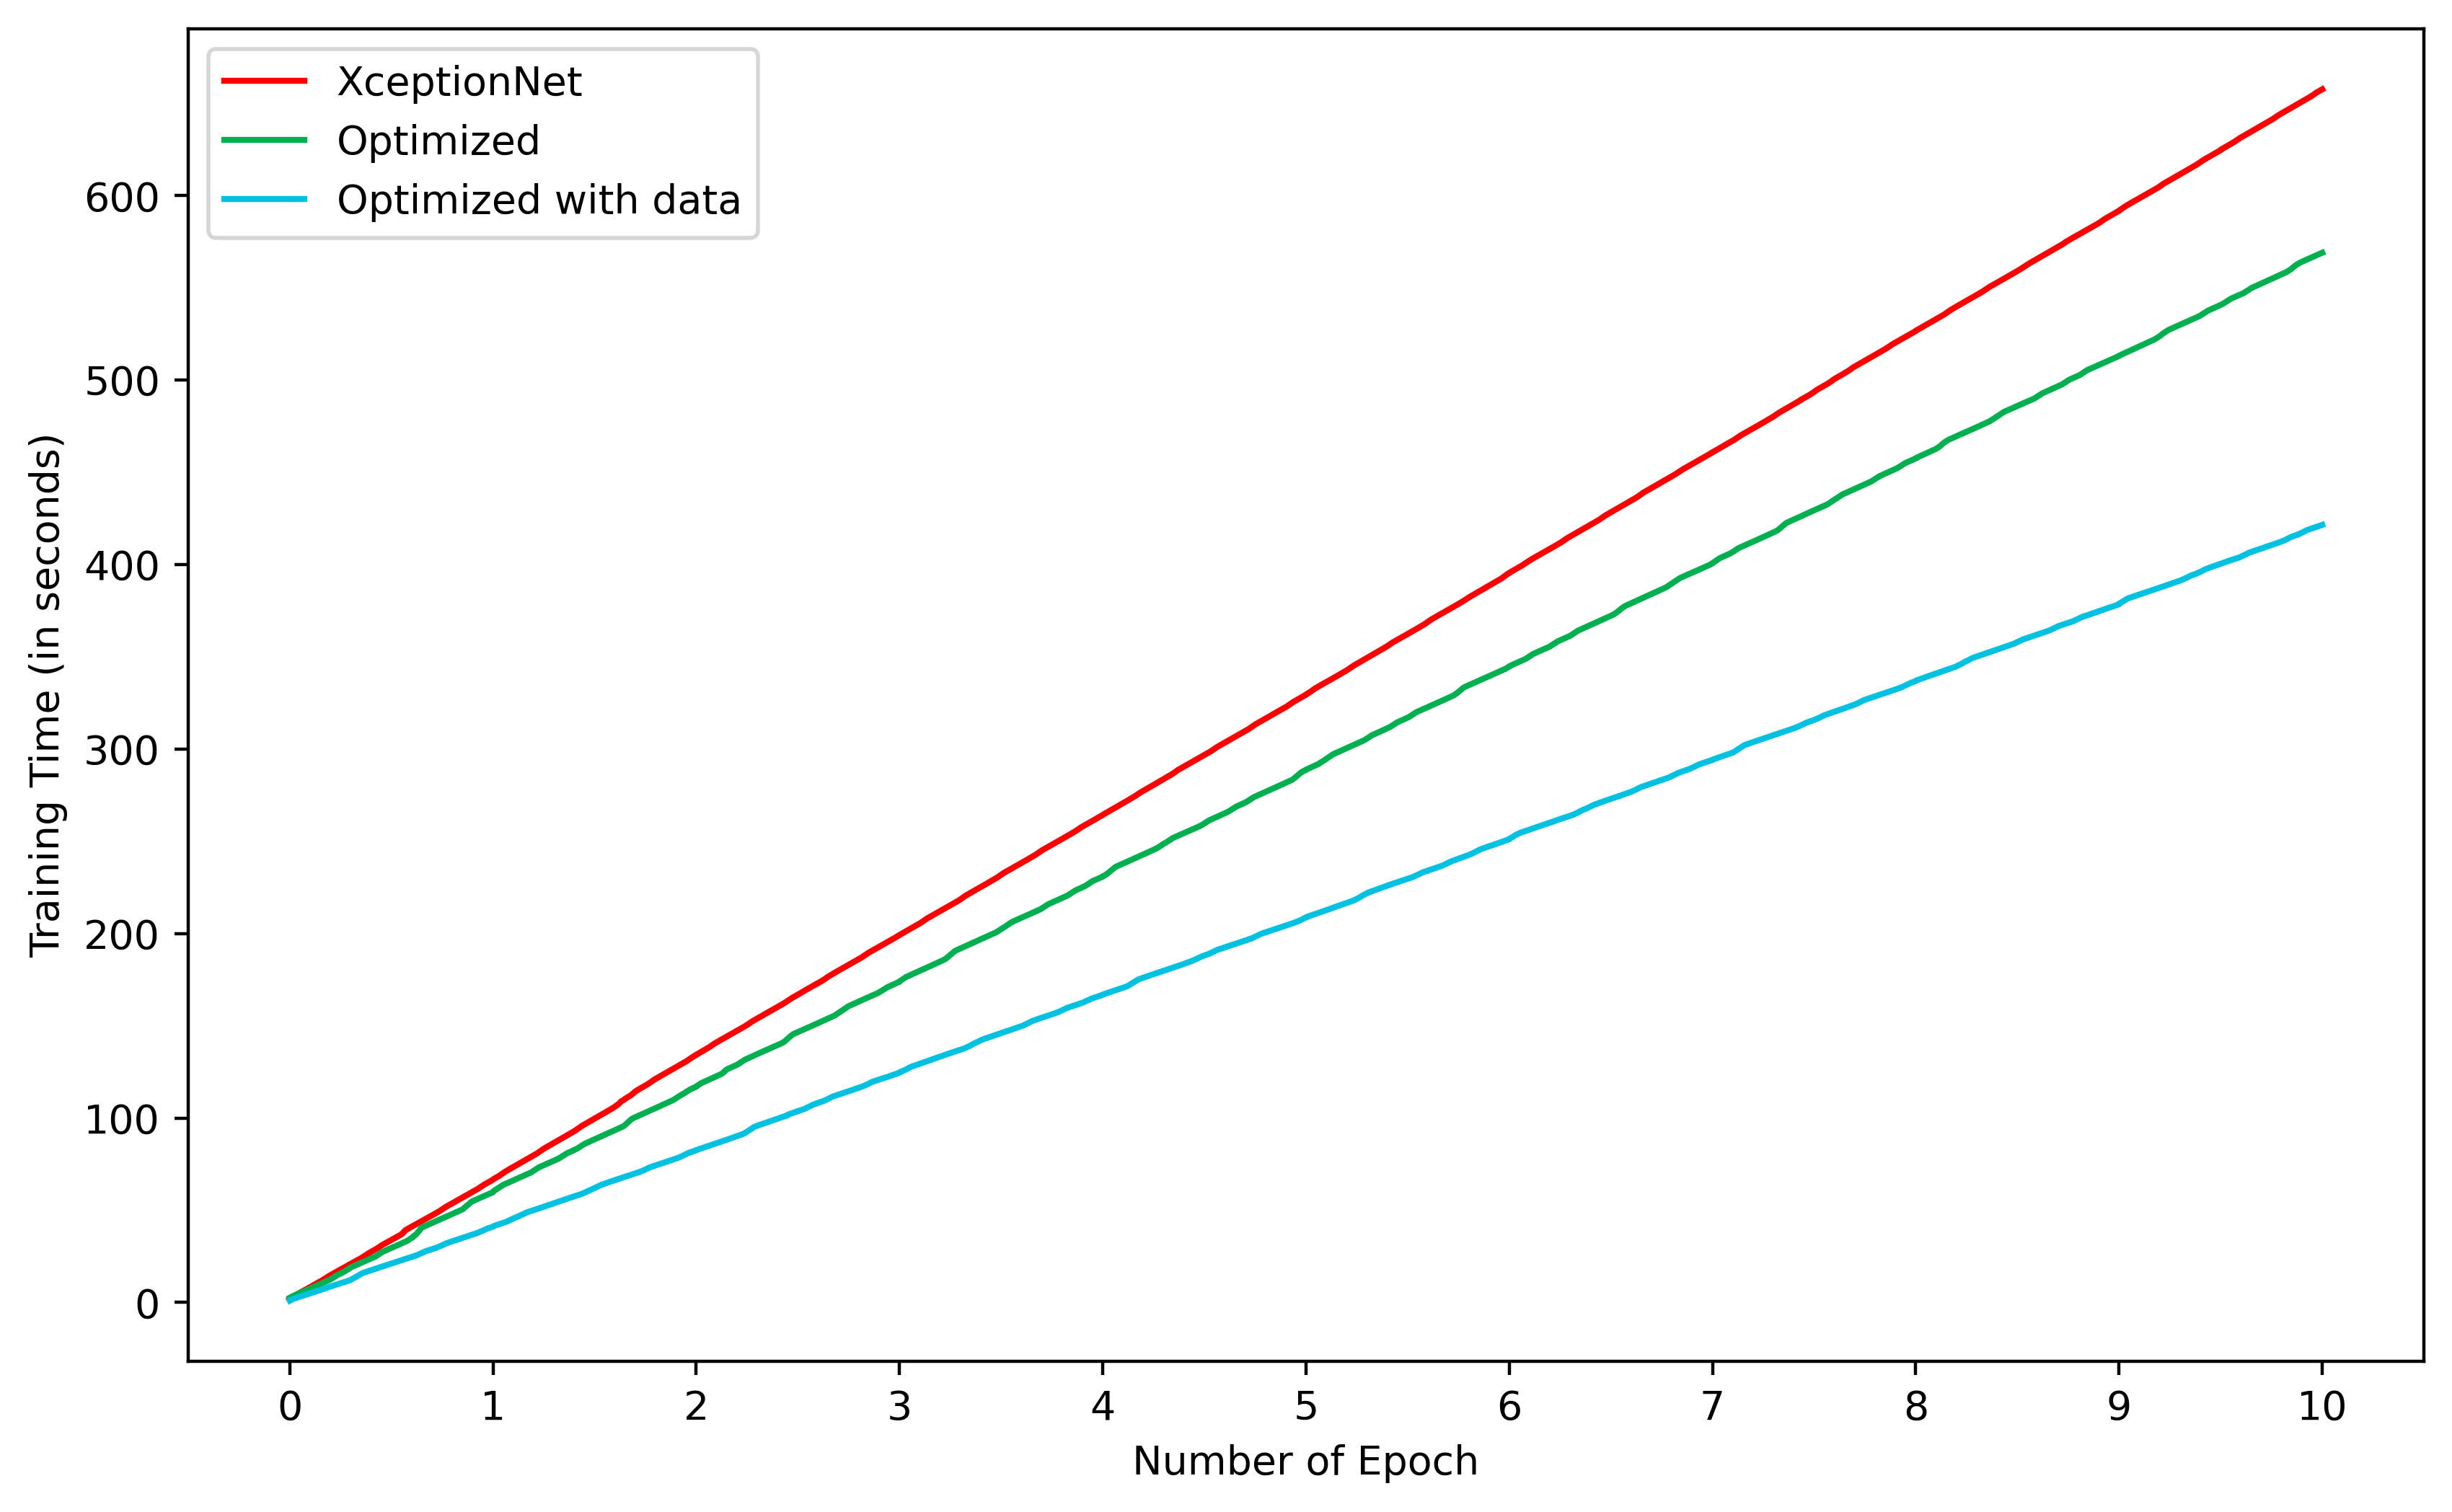

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x_axis_val = []
for i in range(0, 10):
  # st = 0
  for j in range(1, 1564):
    st = (j/1563)
    x_axis_val.append(i+st)
x_axis_val = np.array(x_axis_val)

fig,ax = plt.subplots(figsize =(10,6), dpi=400)
ax.plot(x_axis_val, np.array(xception_t_time), color='red')
ax.plot(x_axis_val, np.array(op_t_time), color='#00b050')
ax.plot(x_axis_val, np.array(dpo_t_time), color='#00c1e0')
plt.xticks(x_tick_val)
plt.xlabel('Number of Epoch')
plt.ylabel('Training Time (in seconds)')
plt.legend(["XceptionNet", "Optimized", "Optimized with data"])
#ax.title("Scores by Teams in 4 Rounds")
plt.show()


40


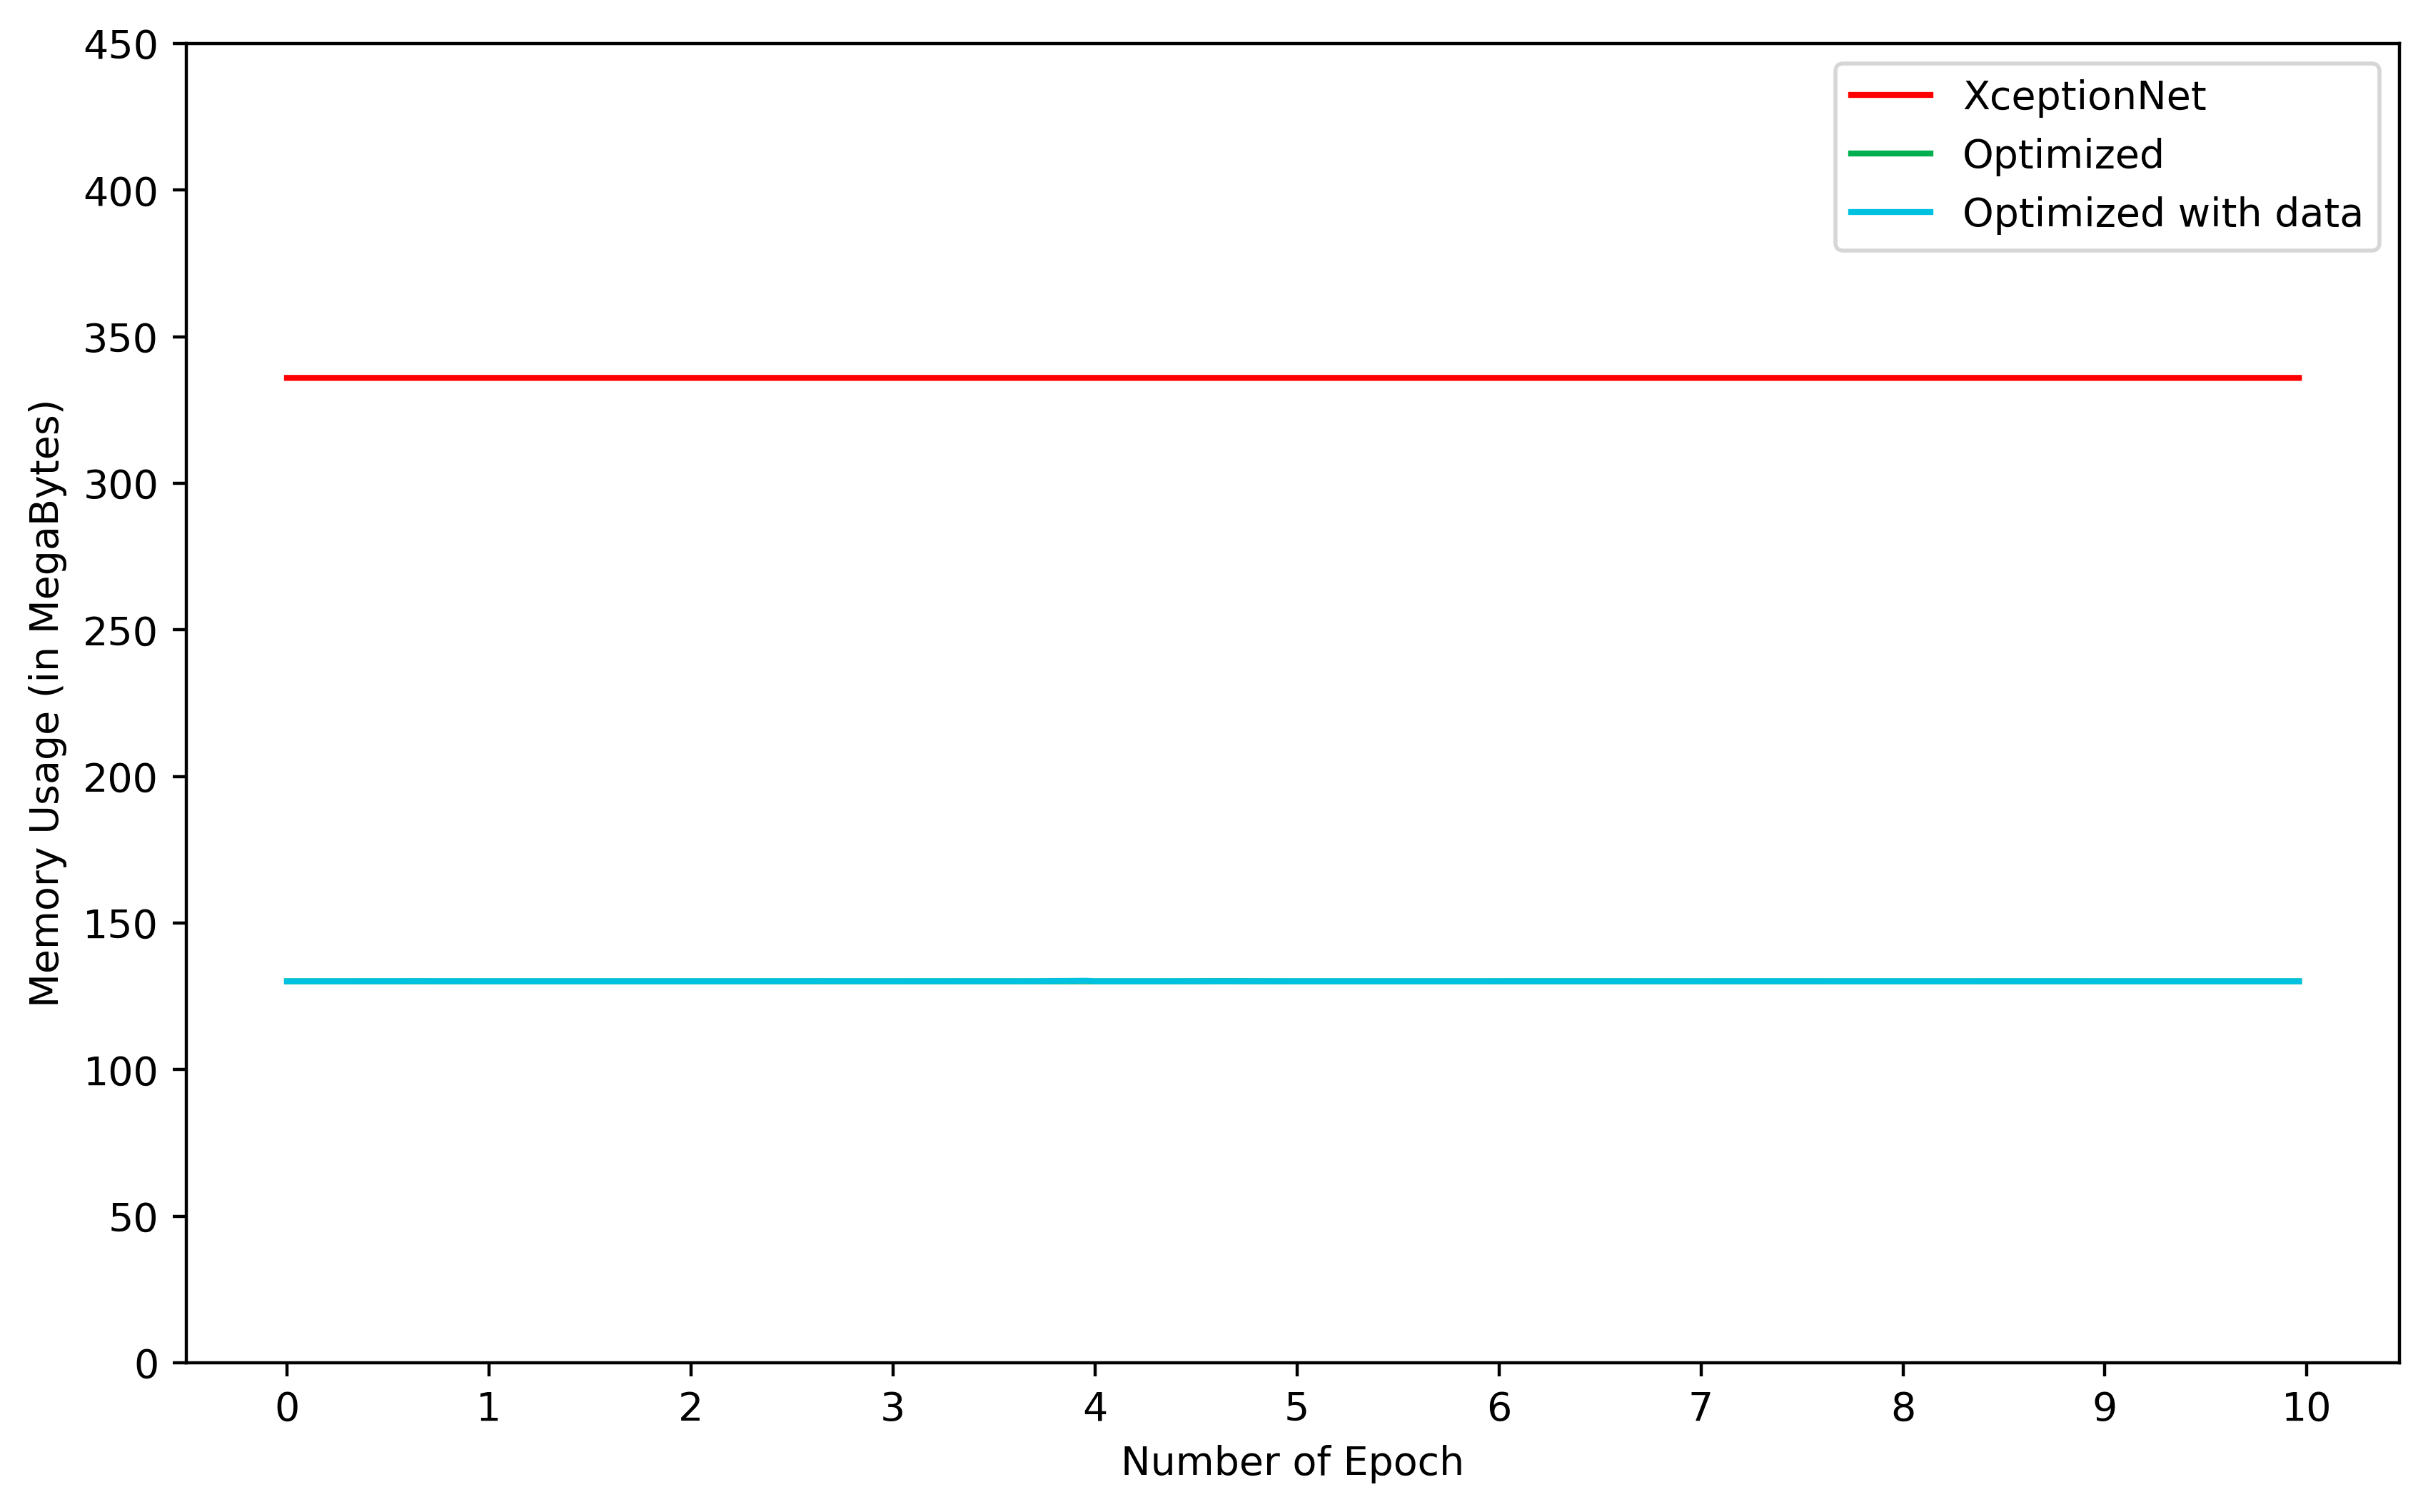

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x_axis_val = []
for i in range(0, 10):
  # st = 0
  for j in range(0, 1563):
    if j%500 == 0:
      st = (j+1)/1563
      x_axis_val.append(i+st)
print(len(x_axis_val))
x_axis_val = np.array(x_axis_val)

fig,ax = plt.subplots(figsize =(10,6), dpi=400)
ax.plot(x_axis_val, np.array(xception_t_mem), color='red')
ax.plot(x_axis_val, np.array(op_t_mem), color='#00b050')
ax.plot(x_axis_val, np.array(dpo_t_mem), color='#00c1e0')
plt.ylim(0, 450)
plt.xticks(x_tick_val)
plt.xlabel('Number of Epoch')
plt.ylabel('Memory Usage (in MegaBytes)')
plt.legend(["XceptionNet", "Optimized", "Optimized with data"])
#ax.title("Scores by Teams in 4 Rounds")
plt.show()

40


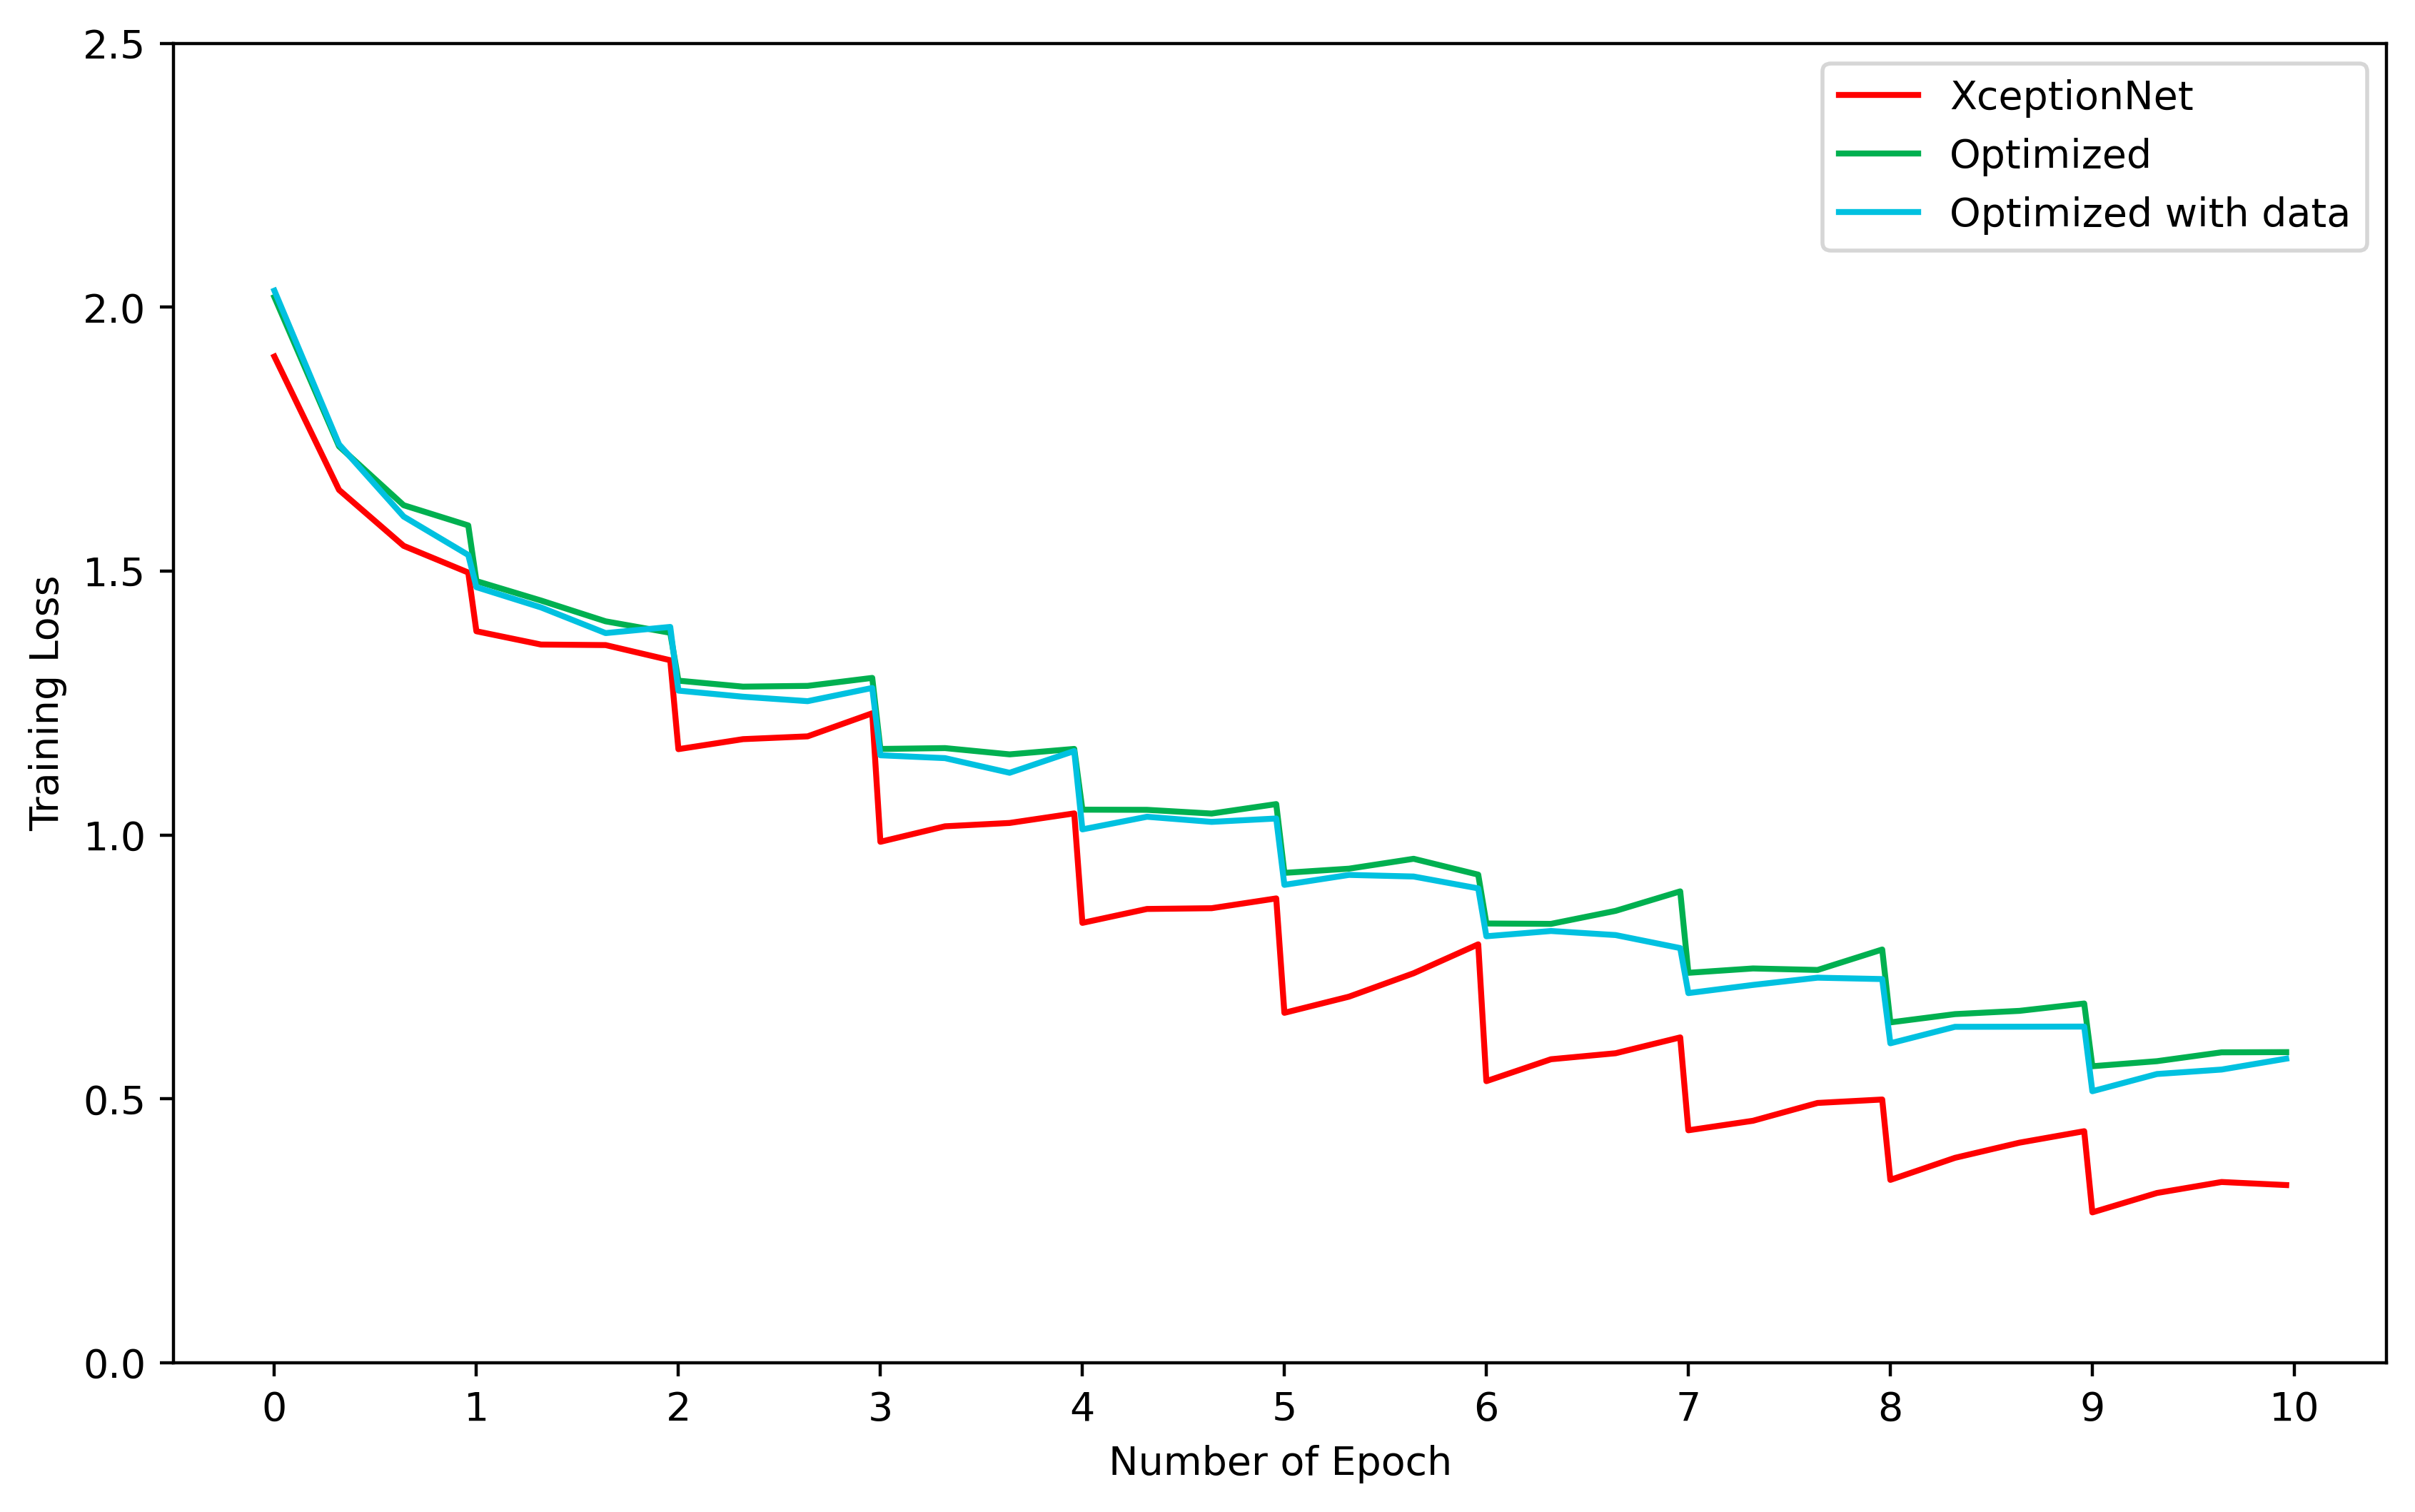

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x_axis_val = []
for i in range(0, 10):
  # st = 0
  for j in range(0, 1563):
    if j%500 == 0:
      st = (j+1)/1563
      x_axis_val.append(i+st)
print(len(x_axis_val))
x_axis_val = np.array(x_axis_val)

fig,ax = plt.subplots(figsize =(10,6), dpi=400)
ax.plot(x_axis_val, np.array(xception_t_loss), color='red')
ax.plot(x_axis_val, np.array(op_t_loss), color='#00b050')
ax.plot(x_axis_val, np.array(dpo_t_loss), color='#00c1e0')
plt.ylim(0, 2.5)
plt.xticks(x_tick_val)
plt.xlabel('Number of Epoch')
plt.ylabel('Training Loss')
plt.legend(["XceptionNet", "Optimized", "Optimized with data"])
#ax.title("Scores by Teams in 4 Rounds")
plt.show()

10


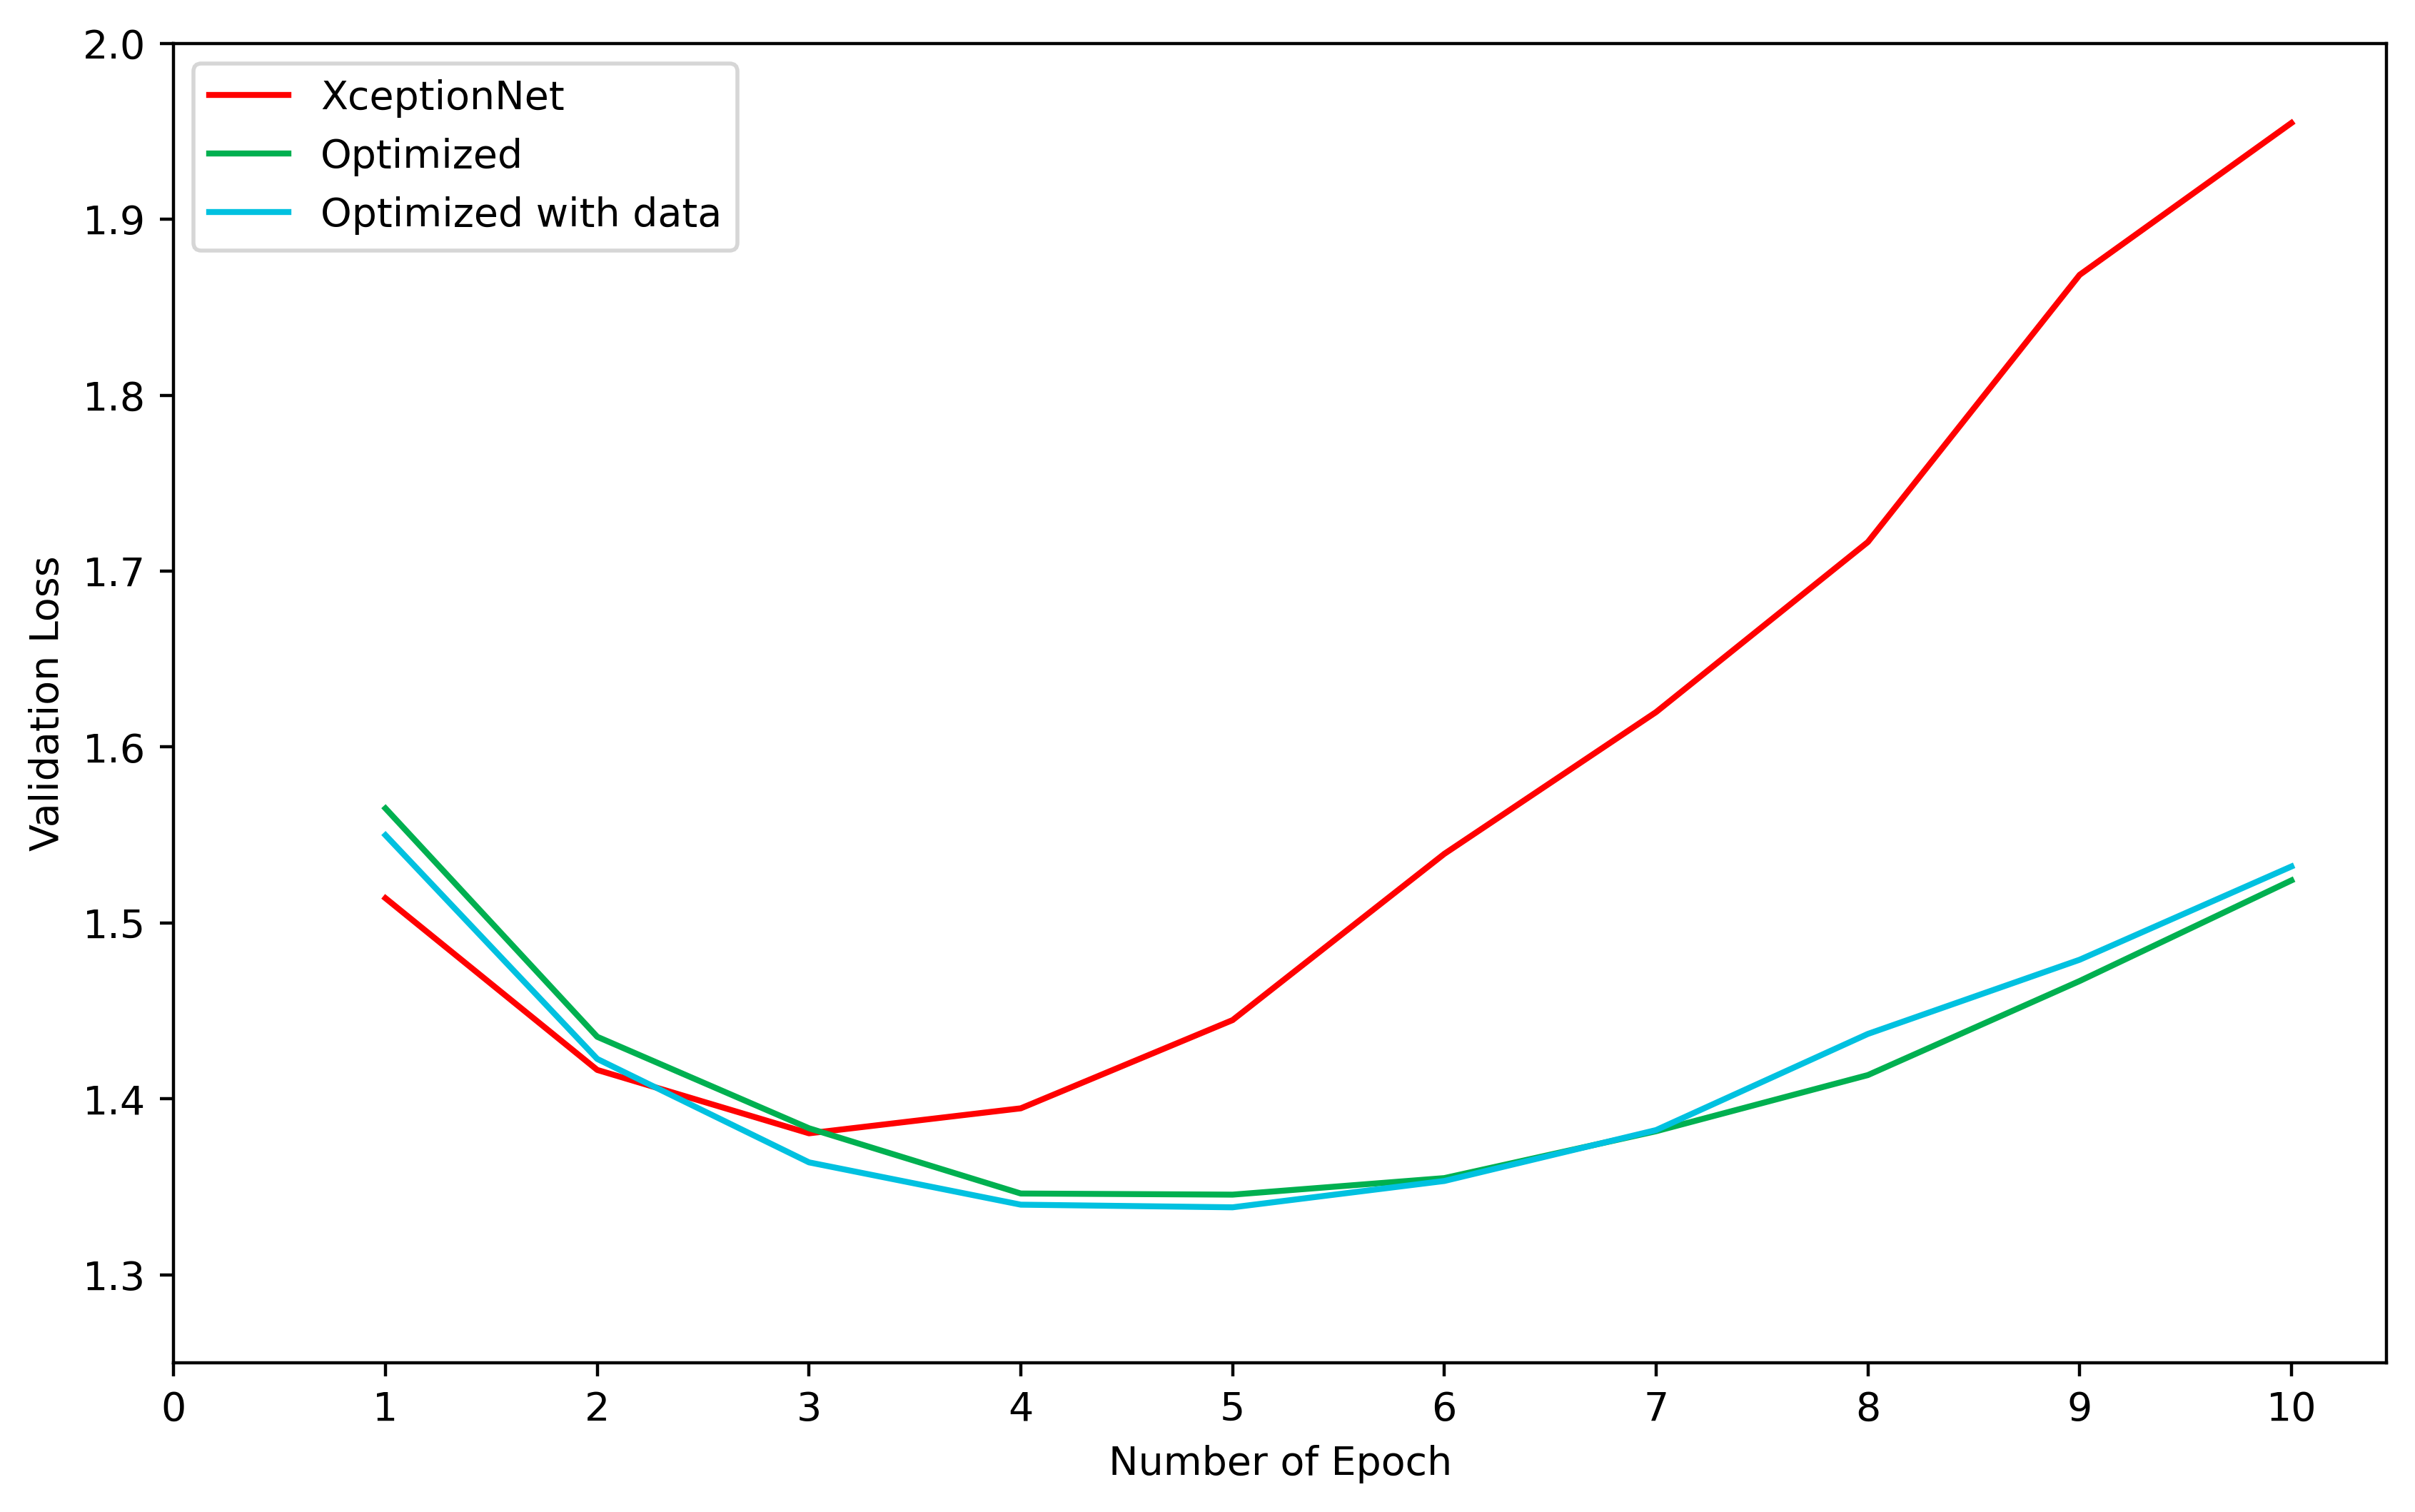

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x_axis_val = []
for i in range(1, 11):
  # st = 0
  # for j in range(0, 1563):
  #   if j%500 == 0:
  #     st = (j+1)/1563
  #     x_axis_val.append(i+st)
  x_axis_val.append(i)
print(len(x_axis_val))
x_axis_val = np.array(x_axis_val)

fig,ax = plt.subplots(figsize =(10,6), dpi=400)
ax.plot(x_axis_val, np.array(xecption_v_loss), color='red')
ax.plot(x_axis_val, np.array(op_v_loss), color='#00b050')
ax.plot(x_axis_val, np.array(dpo_v_loss), color='#00c1e0')
plt.ylim(1.25,2)
plt.xticks(x_tick_val)
plt.xlabel('Number of Epoch')
plt.ylabel('Validation Loss')
plt.legend(["XceptionNet", "Optimized", "Optimized with data"])
#ax.title("Scores by Teams in 4 Rounds")
plt.show()

10


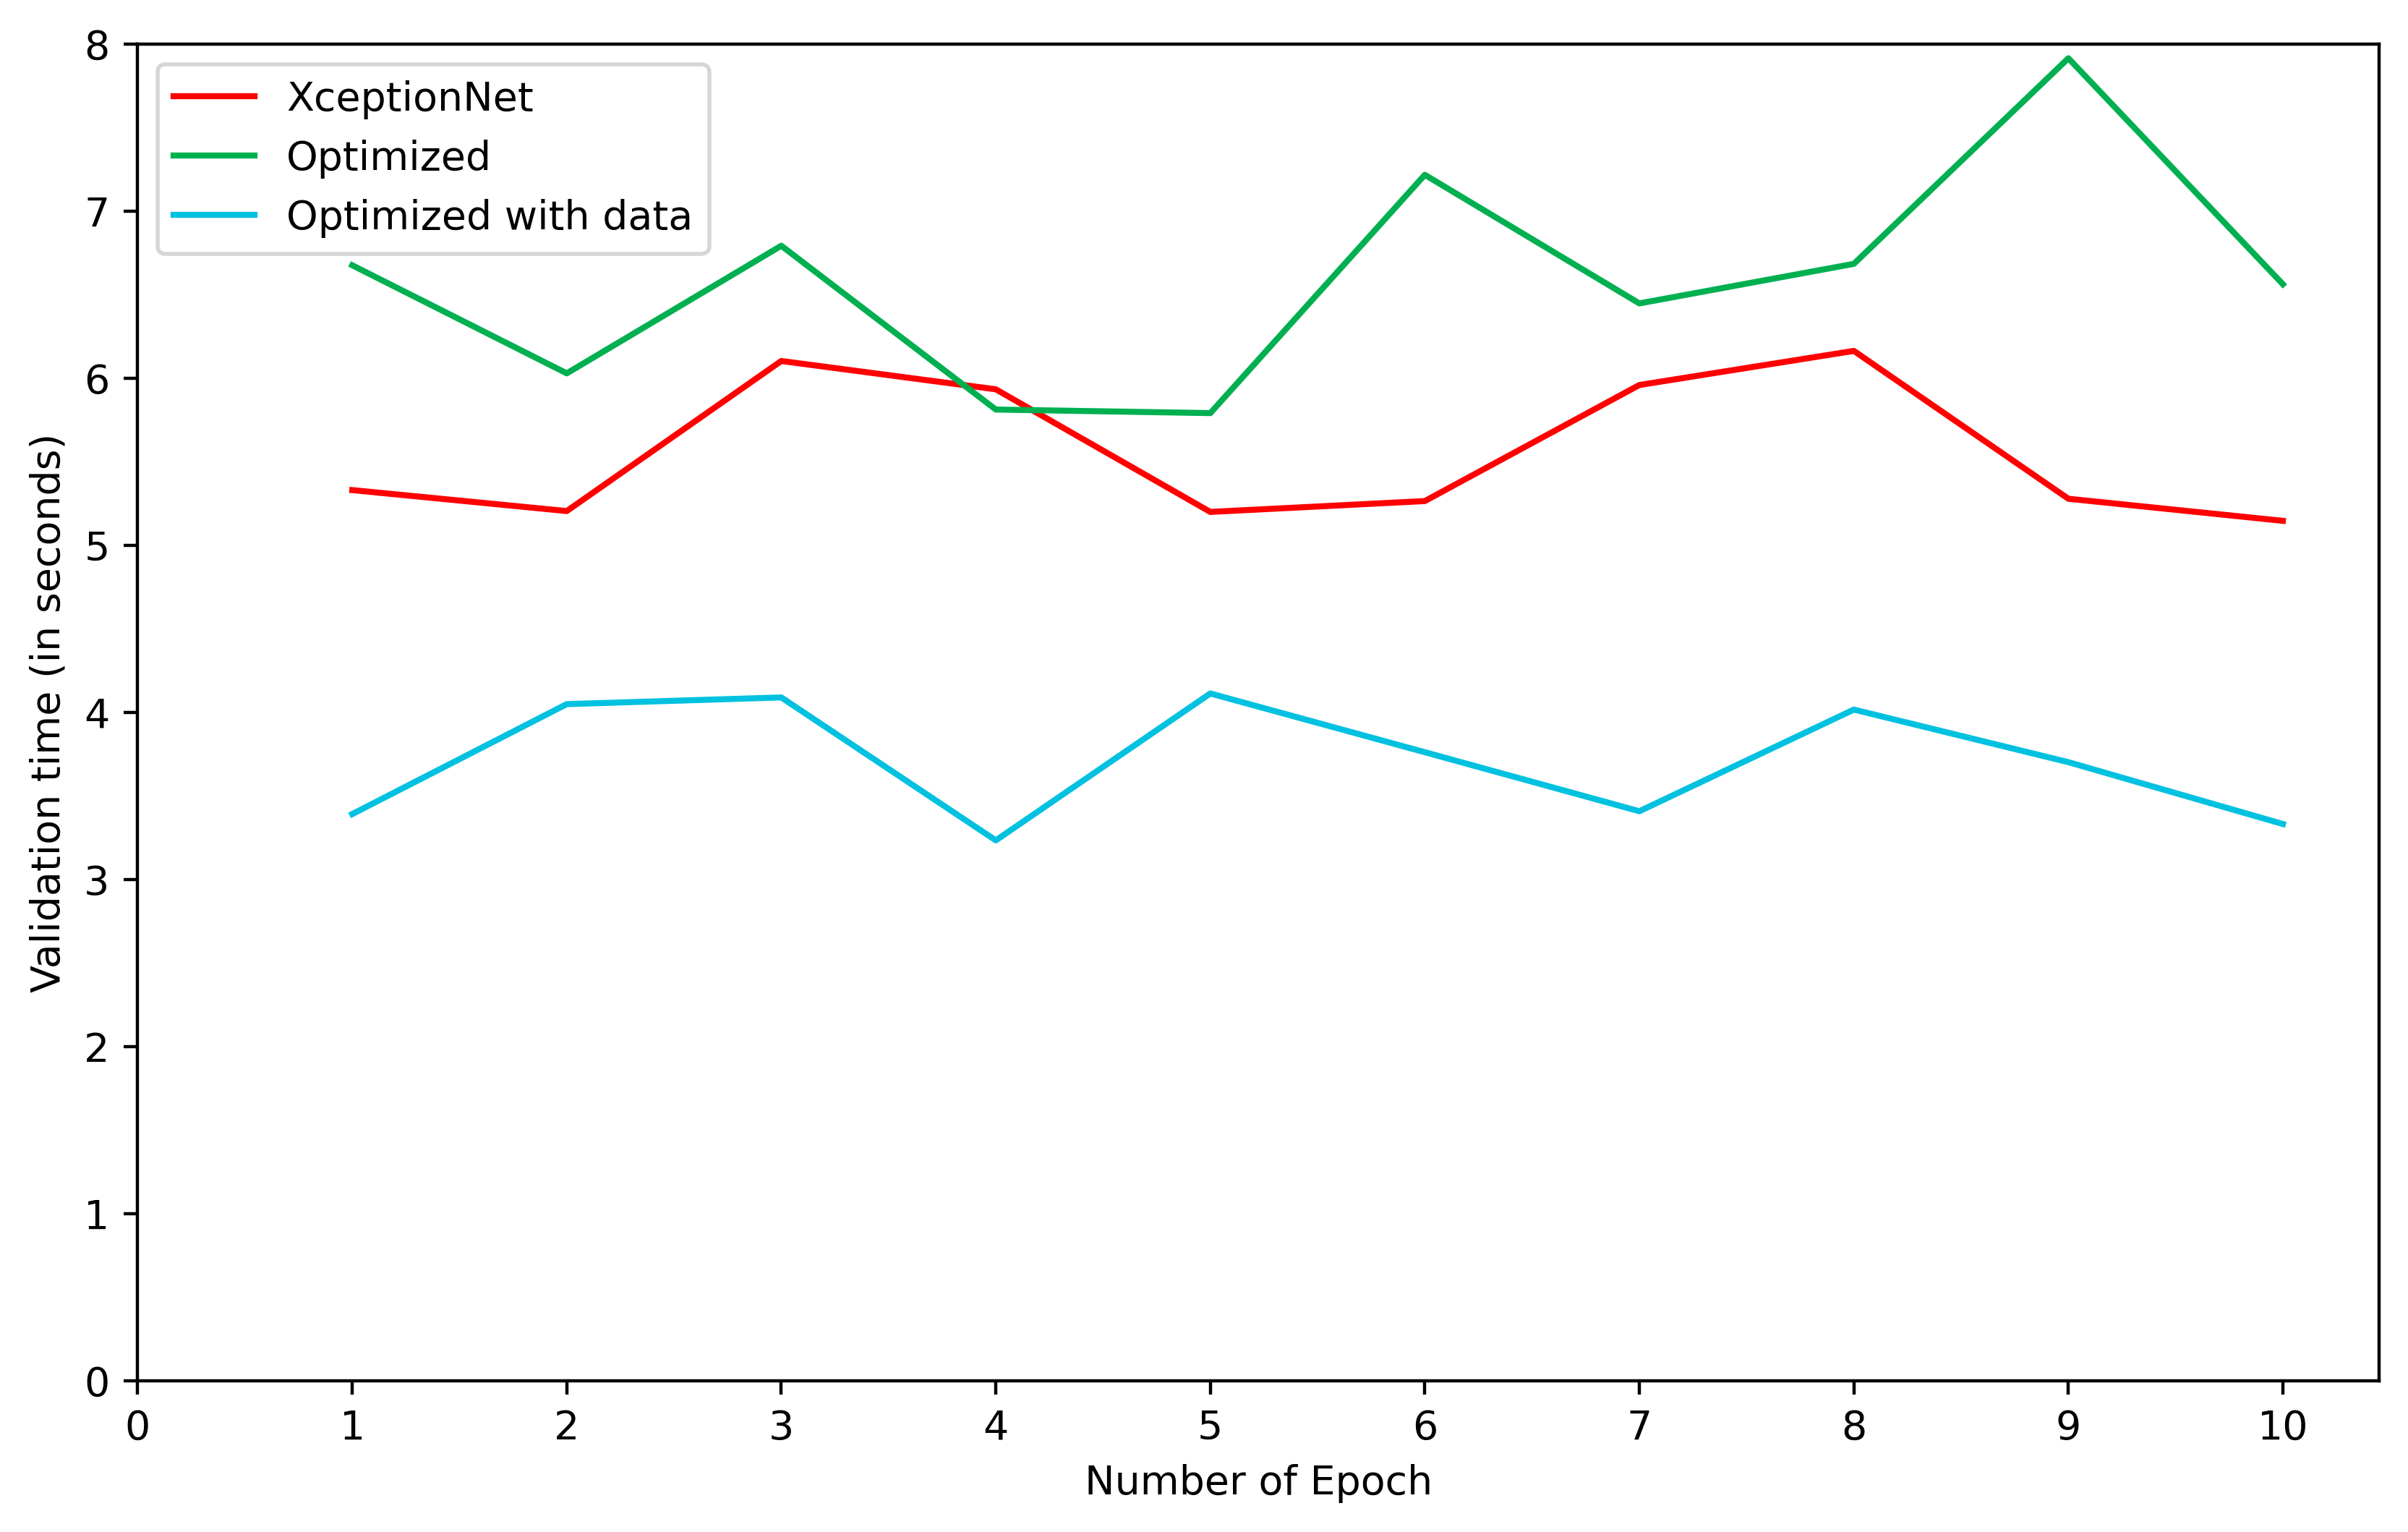

In [8]:
import matplotlib.pyplot as plt
import numpy as np

x_axis_val = []
for i in range(1, 11):
  # st = 0
  # for j in range(0, 1563):
  #   if j%500 == 0:
  #     st = (j+1)/1563
  #     x_axis_val.append(i+st)
  x_axis_val.append(i)
print(len(x_axis_val))
x_axis_val = np.array(x_axis_val)

fig,ax = plt.subplots(figsize =(10,6), dpi=400)
ax.plot(x_axis_val, np.array(xecption_v_time), color='red')
ax.plot(x_axis_val, np.array(op_v_time), color='#00b050')
ax.plot(x_axis_val, np.array(dpo_v_time), color='#00c1e0')
plt.ylim(0, 8)
plt.xticks(x_tick_val)
plt.xlabel('Number of Epoch')
plt.ylabel('Validation time (in seconds)')
plt.legend(["XceptionNet", "Optimized", "Optimized with data"])
#ax.title("Scores by Teams in 4 Rounds")
plt.show()

10


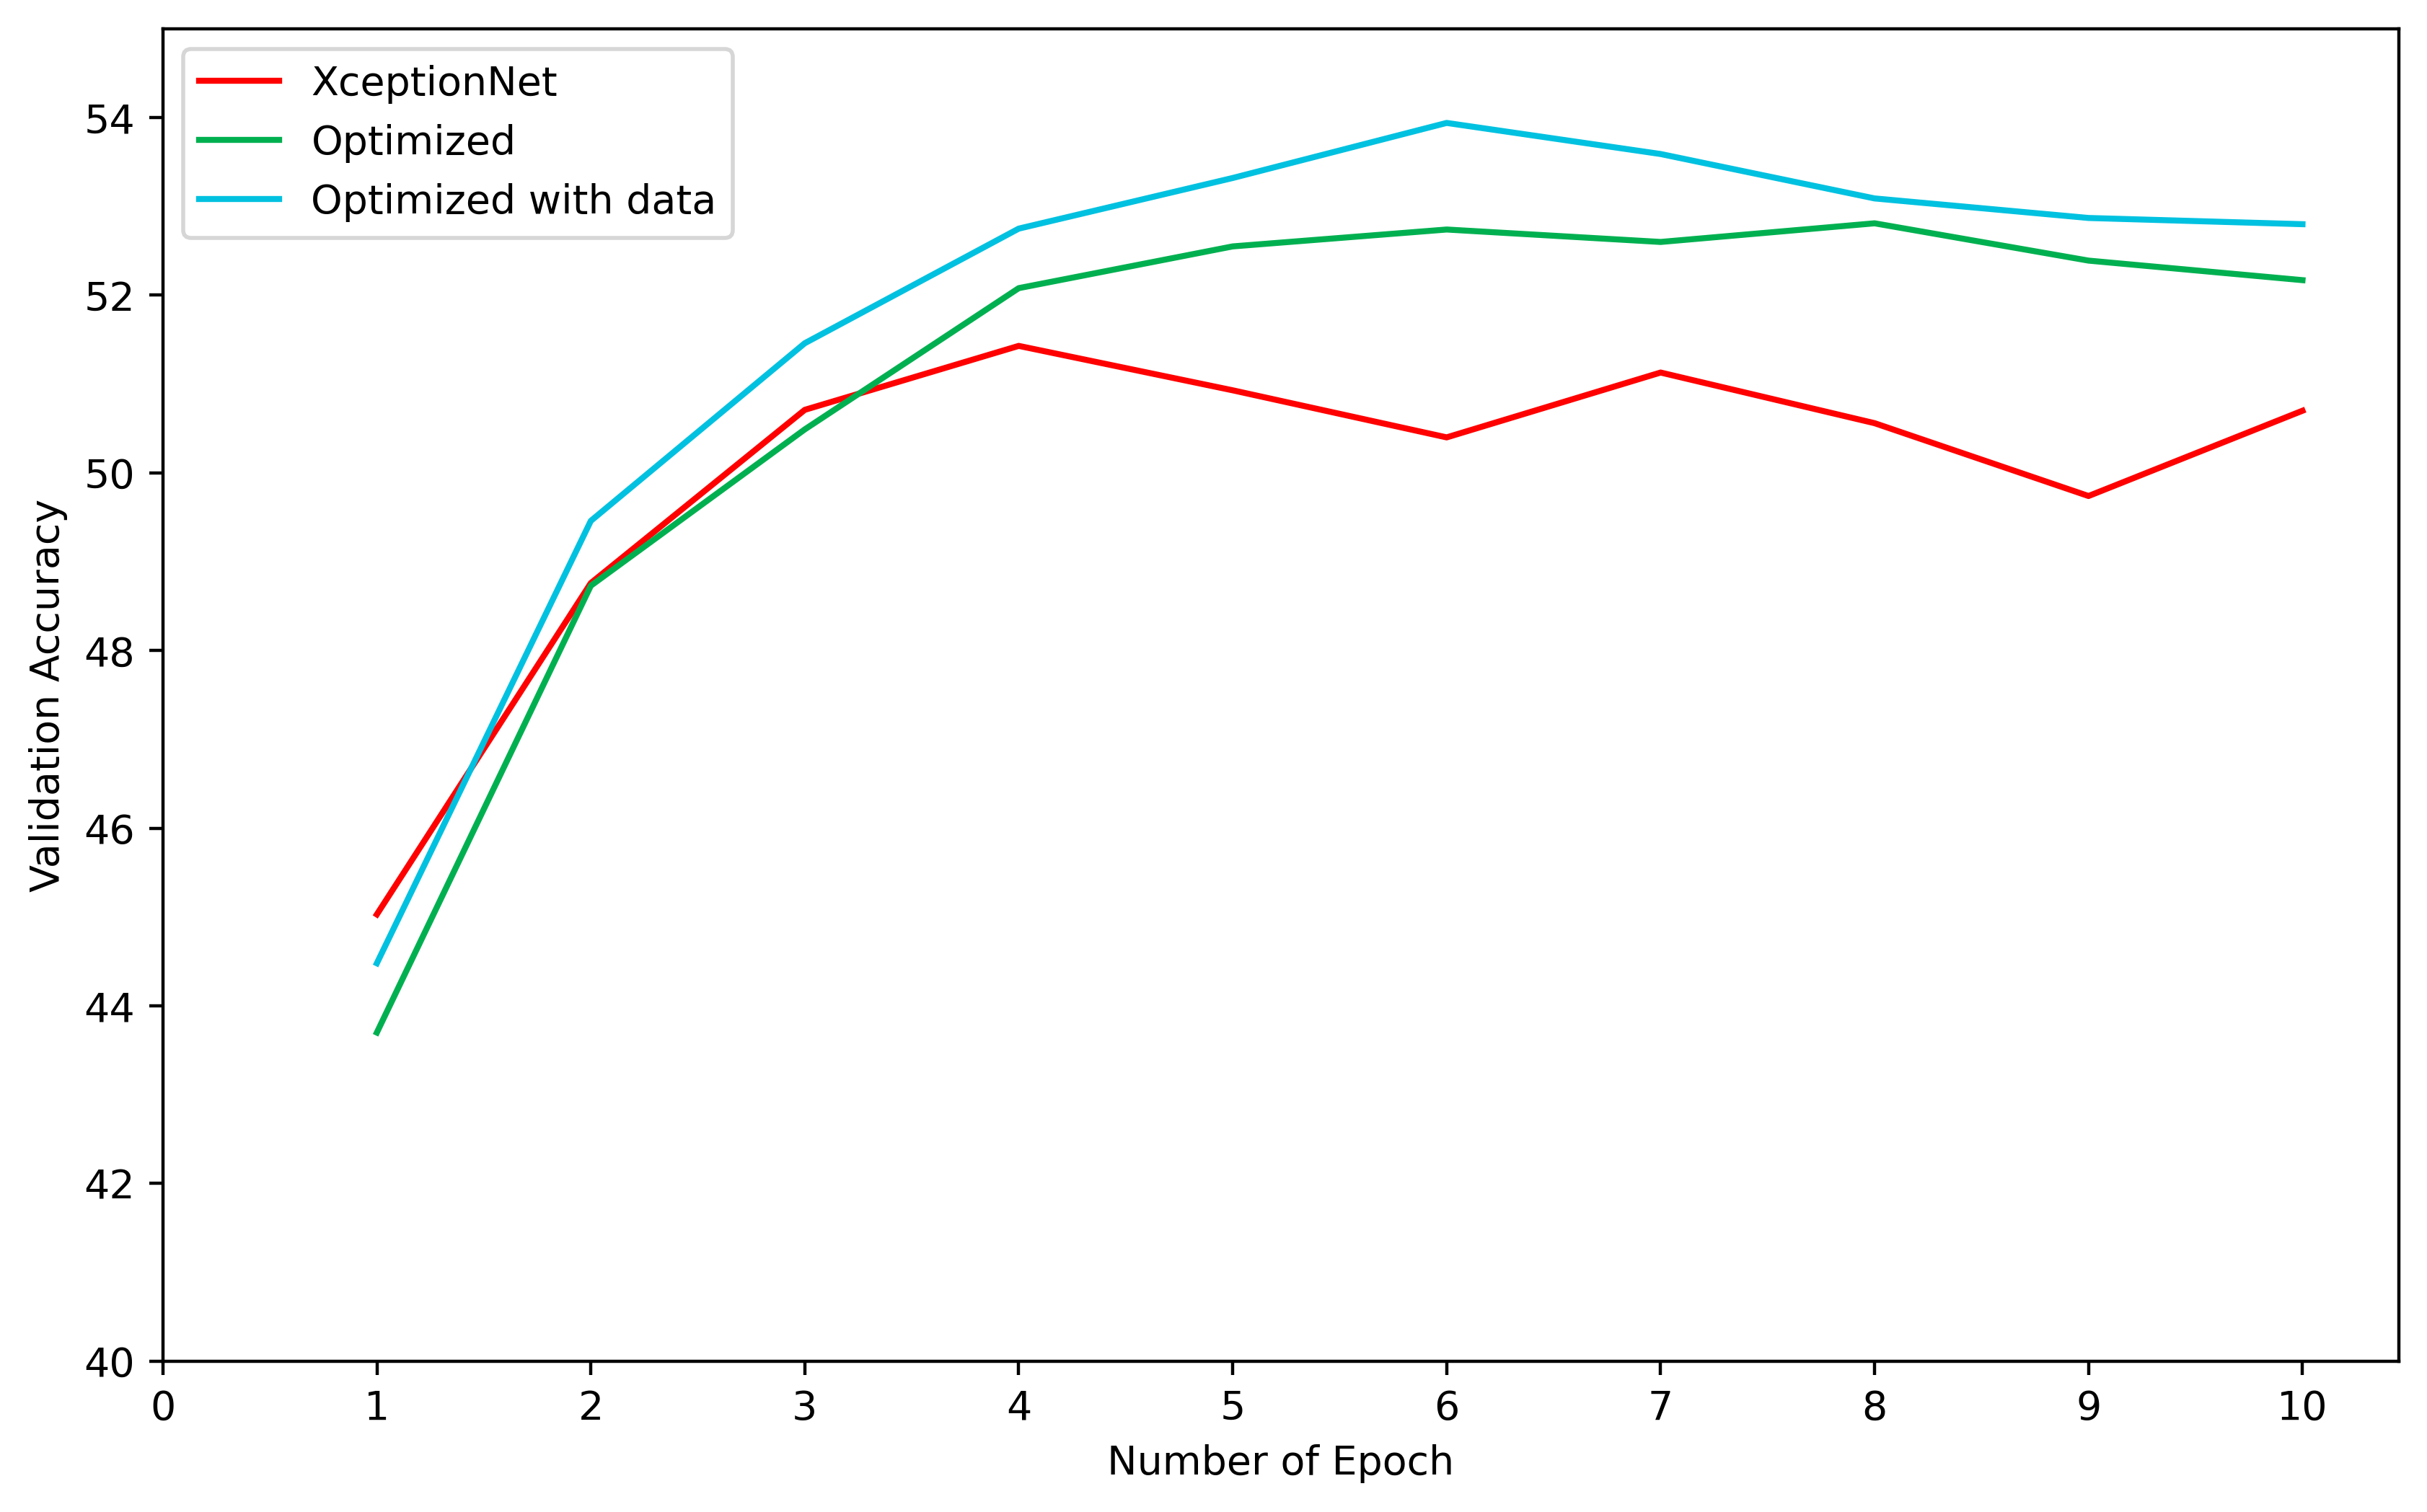

In [9]:
import matplotlib.pyplot as plt
import numpy as np

x_axis_val = []
for i in range(1, 11):
  # st = 0
  # for j in range(0, 1563):
  #   if j%500 == 0:
  #     st = (j+1)/1563
  #     x_axis_val.append(i+st)
  x_axis_val.append(i)
print(len(x_axis_val))
x_axis_val = np.array(x_axis_val)

fig,ax = plt.subplots(figsize =(10,6), dpi=400)
ax.plot(x_axis_val, np.array(xecption_v_acc), color='red')
ax.plot(x_axis_val, np.array(op_v_acc), color='#00b050')
ax.plot(x_axis_val, np.array(dpo_v_acc), color='#00c1e0')
plt.ylim(40, 55)
plt.xticks(x_tick_val)
plt.xlabel('Number of Epoch')
plt.ylabel('Validation Accuracy')
plt.legend(["XceptionNet", "Optimized", "Optimized with data"])
#ax.title("Scores by Teams in 4 Rounds")
plt.show()